This notebook plots the final within-patient beta diversity plots.

I copied this from 2017-12-26.within_patient_beta_div_figure_final.ipynb to make the same plots but with Bray-Curtis.

In [1]:
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
fbclong = '/Users/claire/github/aspiration-analysis/data/analysis/braycurtis.txt'

bc = pd.read_csv(fbclong, sep='\t')
bc.head()

/Users/claire/anaconda/lib/python2.7/site-packages/IPython/core/interactiveshell.py:2714: DtypeWarning: Columns (16,18,35,36,37,38) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


,sample1,sample2,beta,site1,site2,site_comparison,patient_comp,subject,batch1,batch2,...,percent distal acid,percent proximal acid,percent proximal nonacid,percent distal total,number of full colum events/total events,Number of full column episodes,Was Bile CA detected?,Was Bile DCA detected?,Was Bile LCA detected?,Was Bile TCA detected?
0,01-112-7GI,01-112-7RI,0.382969,gastric_fluid,rectal_swab,gastric_fluid-rectal_swab,within,01-112-7,2016,2016,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,01-112-7GI,01-112-7TI,0.994299,gastric_fluid,throat_swab,gastric_fluid-throat_swab,within,01-112-7,2016,2016,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,01-112-7RI,01-112-7TI,0.989603,rectal_swab,throat_swab,rectal_swab-throat_swab,within,01-112-7,2016,2016,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,01-112-7GI,01-164-7GI,0.994963,gastric_fluid,gastric_fluid,gastric_fluid-gastric_fluid,between,NaN,2016,2016,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,01-112-7RI,01-164-7GI,0.990890,rectal_swab,gastric_fluid,rectal_swab-gastric_fluid,between,NaN,2016,2016,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [3]:
bc = bc.query('patient_comp == "within"')
bc['mbs_consolidated'] = bc['mbs_consolidated'].fillna('Not tested')

In [4]:
neworder = ['bal-throat_swab', 'bal-gastric_fluid', 
            'gastric_fluid-throat_swab', 'stool-throat_swab']

# How many site comparisons are duplicate?
bc\
    .query('site_comparison == @neworder')\
    .groupby(['subject', 'site_comparison'])\
    .size()\
    .sort_values(ascending=False)\
    .head(25)

subject   site_comparison          
14-233-0  gastric_fluid-throat_swab    1
04-067-2  bal-gastric_fluid            1
04-054-3  gastric_fluid-throat_swab    1
04-061-8  bal-gastric_fluid            1
          bal-throat_swab              1
          gastric_fluid-throat_swab    1
04-062-8  bal-gastric_fluid            1
          bal-throat_swab              1
          gastric_fluid-throat_swab    1
04-063-7  bal-gastric_fluid            1
          bal-throat_swab              1
          gastric_fluid-throat_swab    1
04-064-5  bal-gastric_fluid            1
          bal-throat_swab              1
          gastric_fluid-throat_swab    1
04-066-0  bal-gastric_fluid            1
          bal-throat_swab              1
04-054-3  bal-throat_swab              1
          bal-gastric_fluid            1
04-050-1  bal-gastric_fluid            1
04-009-2  bal-gastric_fluid            1
03-149-1  stool-throat_swab            1
03-153-7  stool-throat_swab            1
03-156-7  stool-throa

In [5]:
## Keep only comparisons from the same time point

# Nope: I do this in the bray curtis calculation
cleanbc = bc

# ## Get rid of comparisons where sample1 and sample2 end in F/I or I/F, respectively
# #cleanjsd = jsd[
# #    ~(
# #        (jsd['sample1'].str.endswith('F') & jsd['sample2'].str.endswith('I')) 
# #        | (jsd['sample2'].str.endswith('F') & jsd['sample1'].str.endswith('I'))
# #     )]

# # Also get rid of any "final" stool or throat samples - keep only the baseline samples
# # (This code also de-facto gets rid of any un-matched samples)
# cleanbc = bc[
#     ~(  bc['sample1'].str.endswith('F') 
#       | jsd['sample2'].str.endswith('F')
#       | jsd['sample1'].str.endswith('2')
#       | jsd['sample2'].str.endswith('2')
#       | jsd['sample1'].str.endswith('F2T')
#       | jsd['sample2'].str.endswith('F2T')
#       | jsd['sample1'].str.endswith('sick')
#       | jsd['sample2'].str.endswith('sick')
#       | jsd['sample1'].str.startswith('05')
#       | jsd['sample2'].str.startswith('05')
#      )]


In [6]:
bc.shape, cleanbc.shape

((307, 39), (307, 39))

In [7]:
## Check that we don't have any extra comparisons
cleanbc\
    .query('site_comparison == @neworder')\
    .groupby(['subject', 'site_comparison'])\
    .size()\
    .sort_values(ascending=False)\
    .head(20)

subject   site_comparison          
14-233-0  gastric_fluid-throat_swab    1
04-067-2  bal-gastric_fluid            1
04-054-3  gastric_fluid-throat_swab    1
04-061-8  bal-gastric_fluid            1
          bal-throat_swab              1
          gastric_fluid-throat_swab    1
04-062-8  bal-gastric_fluid            1
          bal-throat_swab              1
          gastric_fluid-throat_swab    1
04-063-7  bal-gastric_fluid            1
          bal-throat_swab              1
          gastric_fluid-throat_swab    1
04-064-5  bal-gastric_fluid            1
          bal-throat_swab              1
          gastric_fluid-throat_swab    1
04-066-0  bal-gastric_fluid            1
          bal-throat_swab              1
04-054-3  bal-throat_swab              1
          bal-gastric_fluid            1
04-050-1  bal-gastric_fluid            1
dtype: int64

## Make the basic plot

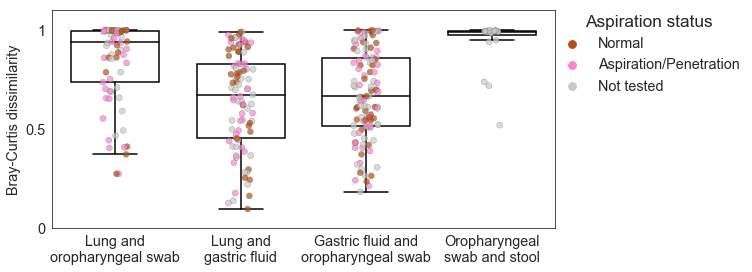

In [8]:
hue_order = ['Normal', 'Aspiration/Penetration', 'Not tested']
pal = {'bal_throat': '#0DA5B3', 
       'bal_gastric': '#823E98', 
       'gastric_throat': '#EAA72E', 
       'stool_throat': '#785C2B',
       'Not tested': '#C9C9C9',
       'Normal': '#B25116',
       'Aspiration/Penetration': '#FB84D1'}

boxprops = {'edgecolor': 'k', 'facecolor': 'w'}
lineprops = {'color': 'k'}

sns.set_style('white')
fig, ax = plt.subplots(figsize=(9,4))
sns.boxplot(data=cleanbc, x='site_comparison', y='beta', 
            fliersize=0, order=neworder, ax=ax,
            color='1.0', width=0.7, hue_order=hue_order,
            **{'boxprops': boxprops, 'medianprops': lineprops,
                   'whiskerprops': lineprops, 'capprops': lineprops})
sns.stripplot(data=cleanbc, x='site_comparison', y='beta', 
              order=neworder, ax=ax, hue_order=hue_order,
              hue='mbs_consolidated', dodge=False, palette=pal,
              jitter=True, size=6, linewidth=0.25, alpha=0.7)

# Axes
ax.set_xticklabels(['Lung and\noropharyngeal swab', 
                    'Lung and\ngastric fluid', 
                    'Gastric fluid and\noropharyngeal swab', 
                    'Oropharyngeal\nswab and stool'],
                  fontsize='x-large')
ax.set_ylim([0, 1.1])
ax.set_yticks([0, 0.5, 1])
ax.set_yticklabels([0, 0.5, 1], fontsize='x-large')

# Legend
lgd = ax.legend(bbox_to_anchor=(0.98, 0.8), 
                loc='center left', fontsize='x-large',
                frameon=False)
lgd.set_title('Aspiration status', prop={'size': 'xx-large'})

# Labels and stuff
#ax.set_title('Intra-patient beta diversity', fontsize='xx-large')
ax.set_xlabel('')
ax.set_ylabel('Bray-Curtis dissimilarity', fontsize='x-large')

#txt = ax.text(-0.11, 1.025, 'A', transform=ax.transAxes, fontsize=24)

fig.savefig('../../final/figures/suppfig.within_patient_beta_div.braycurtis.png', 
            bbox_extra_artists=(lgd, ), bbox_inches='tight',
            dpi=200)


## Calculate pvalues

In [9]:
from scipy.stats import ranksums

asp = 'Aspiration/Penetration'
nml = 'Normal'

for s1 in neworder:
    x = cleanbc.query('site_comparison == @s1')['beta']
    for s2 in neworder[neworder.index(s1)+1:]:
        y = cleanbc.query('site_comparison == @s2')['beta']
        print(s1, s2, ranksums(x, y))

('bal-throat_swab', 'bal-gastric_fluid', RanksumsResult(statistic=5.898344956460646, pvalue=3.671657453979643e-09))
('bal-throat_swab', 'gastric_fluid-throat_swab', RanksumsResult(statistic=5.603465290215774, pvalue=2.1010820684395872e-08))
('bal-throat_swab', 'stool-throat_swab', RanksumsResult(statistic=-1.2717131928105052, pvalue=0.2034750414130576))
('bal-gastric_fluid', 'gastric_fluid-throat_swab', RanksumsResult(statistic=-0.721216723775567, pvalue=0.47077618389019293))
('bal-gastric_fluid', 'stool-throat_swab', RanksumsResult(statistic=-5.710290960395712, pvalue=1.127831888197484e-08))
('gastric_fluid-throat_swab', 'stool-throat_swab', RanksumsResult(statistic=-5.253761181478137, pvalue=1.4902409275852302e-07))


# Sample size info

The following table shows the number of samples for each site combination (`count` column), and the mean, std, min, max, etc... values for the JSD for each site combination.

In [10]:
cleanbc\
    .query('site_comparison == @neworder')\
    .groupby('site_comparison')\
    ['beta']\
    .describe()\
    .loc[neworder]

,count,mean,std,min,25%,50%,75%,max
site_comparison,,,,,,,,
bal-throat_swab,73.0,0.842774,0.207160,0.271937,0.735167,0.940197,0.995707,0.999725
bal-gastric_fluid,88.0,0.639558,0.245982,0.094270,0.451963,0.668555,0.829670,0.990074
gastric_fluid-throat_swab,111.0,0.668613,0.223388,0.180313,0.515114,0.664736,0.859703,0.998526
stool-throat_swab,20.0,0.937549,0.127779,0.518378,0.973969,0.991727,0.995074,0.997928


This table shows the same info as above, but now split by aspiration status.

In [11]:
cleanbc\
    .query('site_comparison == @neworder')\
    .groupby(['site_comparison', 'mbs_consolidated'])\
    ['beta']\
    .describe()\
    .loc[neworder]

count      mean       std  \
site_comparison           mbs_consolidated                                    
bal-gastric_fluid         Aspiration/Penetration   29.0  0.649029  0.223396   
                          Normal                   28.0  0.684697  0.272561   
                          Not tested               31.0  0.589927  0.239785   
bal-throat_swab           Aspiration/Penetration   25.0  0.780744  0.222579   
                          Normal                   23.0  0.880349  0.218775   
                          Not tested               25.0  0.870235  0.170832   
gastric_fluid-throat_swab Aspiration/Penetration   32.0  0.668506  0.229420   
                          Normal                   35.0  0.674442  0.225053   
                          Not tested               44.0  0.664053  0.222743   
stool-throat_swab         Not tested               20.0  0.937549  0.127779   

                                                       min       25%  \
site_comparison           mbs_consolidated                             
bal-gastric_fluid         Aspiration/Penetration  0.174574  0.472467   
                          Normal                  0.094270  0.507694   
                          Not tested              0.124720  0.409322   
bal-throat_swab           Aspiration/Penetration  0.271937  0.654654   
                          Normal                  0.272344  0.873394   
                          Not tested              0.464611  0.786258   
gastric_fluid-throat_swab Aspiration/Penetration  0.211768  0.501638   
                          Normal                  0.233262  0.545257   
                          Not tested              0.180313  0.515373   
stool-throat_swab         Not tested              0.518378  0.973969   

                                                       50%       75%       max  
site_comparison           mbs_consolidated                                      
bal-gastric_fluid         Aspiration/Penetration  0.644773  0.829523  0.975168  
                          Normal                  0.778569  0.903601  0.989836  
                          Not tested              0.638872  0.752783  0.990074  
bal-throat_swab           Aspiration/Penetration  0.858581  0.982443  0.999653  
                          Normal                  0.992878  0.997637  0.999061  
                          Not tested              0.964228  0.997023  0.999725  
gastric_fluid-throat_swab Aspiration/Penetration  0.704480  0.848797  0.996873  
                          Normal                  0.661113  0.877959  0.998526  
                          Not tested              0.662653  0.860350  0.994299  
stool-throat_swab         Not tested              0.991727  0.995074  0.997928